# ELUC Predictor

In [ ]:
# %pip install zarr
# %pip install regionmask
# %pip install xgboost
# %pip install scikit-learn

In [52]:
import numpy as np
import pandas as pd
import regionmask
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_zarr("processed/merged_aggregated_dataset_1850_2022.zarr.zip", consolidated=True)

## Shift ELUC by 1 year
According to the [ELUC Data Exploration](ELUC_data_exploration.ipynb) notebook ELUC is off by one year when compared to the change in land use. Shifting it by 1 year here.

In [3]:
ds['ELUC'] = ds['ELUC'].roll(time=1, roll_coords=False)
ds['ELUC_diff'] = ds['ELUC_diff'].roll(time=1, roll_coords=False)

## Add countries

In [4]:
ds = ds.stack(latlon=('lat', 'lon'))

In [5]:
regionmask.__version__

'0.9.0'

In [6]:
# Train on countries 0-80, and test on the rest, and test on the last 15 years of data
country_mask = regionmask.defined_regions.natural_earth_v5_0_0.countries_110.mask(ds)
ds = ds.assign_coords(country=country_mask)

In [7]:
ds

<xarray.Dataset>
Dimensions:         (time: 173, latlon: 966240)
Coordinates:
    mask            (latlon) float64 nan nan nan nan ... 159.0 159.0 159.0 159.0
  * time            (time) int32 1850 1851 1852 1853 ... 2019 2020 2021 2022
  * latlon          (latlon) object MultiIndex
  * lat             (latlon) float32 83.38 83.38 83.38 ... -89.88 -89.88 -89.88
  * lon             (latlon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
    country         (latlon) float64 nan nan nan nan ... 159.0 159.0 159.0 159.0
Data variables: (12/28)
    ELUC            (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    ELUC_diff       (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    c3ann           (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    c3ann_diff      (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    c3nfx           (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    c3nfx_diff      (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    ...              ...
    secdf           (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    secdf_diff      (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    secdn           (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    secdn_diff      (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    urban           (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    urban_diff      (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>

In [8]:
countries = regionmask.defined_regions.natural_earth_v5_0_0.countries_110
countries

<regionmask.Regions>
Name:     Natural Earth Countries: 110m
Source:   http://www.naturalearthdata.com
overlap:  False

Regions:
  0 FJ                     Fiji
  1 TZ                 Tanzania
  2 WS                W. Sahara
  3 CA                   Canada
  4 US United States of America
 .. ..                      ...
172 RS                   Serbia
173 ME               Montenegro
174 KO                   Kosovo
175 TT      Trinidad and Tobago
176 SS                 S. Sudan

[177 regions]

In [9]:
ds.country

<xarray.DataArray 'country' (latlon: 966240)>
array([ nan,  nan,  nan, ..., 159., 159., 159.])
Coordinates:
    mask     (latlon) float64 nan nan nan nan nan ... 159.0 159.0 159.0 159.0
  * latlon   (latlon) object MultiIndex
  * lat      (latlon) float32 83.38 83.38 83.38 83.38 ... -89.88 -89.88 -89.88
  * lon      (latlon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
    country  (latlon) float64 nan nan nan nan nan ... 159.0 159.0 159.0 159.0

In [10]:
np.unique(ds.time)

array([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871,
       1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 20

## Remove NaN ELUC_diff

In [11]:
# Create a boolean mask based on NaN values for ELUC_diff
mask = ds['ELUC_diff'].isnull()

In [12]:
# Filter the dataset based on the mask
ds = ds.where(~mask, drop=True)

## Train and test sets
Create a dataset for a single country to keep it small and easy to train on  
Country: United Kingdom  
Train on data between 1850 and 2007  
Test on data after 2007 (i.e. 2008 to 2021)

In [13]:
countries_df = countries.to_dataframe()
countries_df

,abbrevs,names
numbers,,
0,FJ,Fiji
1,TZ,Tanzania
2,WS,W. Sahara
3,CA,Canada
4,US,United States of America
...,...,...
172,RS,Serbia
173,ME,Montenegro
174,KO,Kosovo


In [14]:
countries_df[countries_df.names == 'United Kingdom']

,abbrevs,names
numbers,,
143,GB,United Kingdom


In [15]:
# train_da = dataset.where(dataset.country <= 80, drop=True).where(dataset.time <= 2007, drop=True)
# test_da = dataset.where(dataset.country > 80,  drop=True).where(dataset.time > 2007, drop=True)
train_da = ds.where(ds.country == 143, drop=True).where(ds.time <= 2007, drop=True)
test_da = ds.where(ds.country == 143,  drop=True).where(ds.time > 2007, drop=True)

In [16]:
train_da

<xarray.Dataset>
Dimensions:         (time: 156, latlon: 502)
Coordinates:
    mask            (latlon) float64 143.0 143.0 143.0 ... 143.0 143.0 143.0
  * time            (time) int32 1852 1853 1854 1855 ... 2004 2005 2006 2007
  * latlon          (latlon) object MultiIndex
  * lat             (latlon) float32 58.62 58.38 58.38 ... 50.12 50.12 50.12
  * lon             (latlon) float32 -3.125 -5.125 -4.875 ... -5.375 -5.125
    country         (latlon) float64 143.0 143.0 143.0 ... 143.0 143.0 143.0
Data variables: (12/28)
    ELUC            (time, latlon) float32 dask.array<chunksize=(156, 1), meta=np.ndarray>
    ELUC_diff       (time, latlon) float32 dask.array<chunksize=(156, 1), meta=np.ndarray>
    c3ann           (time, latlon) float32 dask.array<chunksize=(156, 1), meta=np.ndarray>
    c3ann_diff      (time, latlon) float32 dask.array<chunksize=(156, 1), meta=np.ndarray>
    c3nfx           (time, latlon) float32 dask.array<chunksize=(156, 1), meta=np.ndarray>
    c3nfx_diff      (time, latlon) float32 dask.array<chunksize=(156, 1), meta=np.ndarray>
    ...              ...
    secdf           (time, latlon) float32 dask.array<chunksize=(156, 1), meta=np.ndarray>
    secdf_diff      (time, latlon) float32 dask.array<chunksize=(156, 1), meta=np.ndarray>
    secdn           (time, latlon) float32 dask.array<chunksize=(156, 1), meta=np.ndarray>
    secdn_diff      (time, latlon) float32 dask.array<chunksize=(156, 1), meta=np.ndarray>
    urban           (time, latlon) float32 dask.array<chunksize=(156, 1), meta=np.ndarray>
    urban_diff      (time, latlon) float32 dask.array<chunksize=(156, 1), meta=np.ndarray>

In [17]:
test_da

<xarray.Dataset>
Dimensions:         (time: 15, latlon: 502)
Coordinates:
    mask            (latlon) float64 143.0 143.0 143.0 ... 143.0 143.0 143.0
  * time            (time) int32 2008 2009 2010 2011 ... 2019 2020 2021 2022
  * latlon          (latlon) object MultiIndex
  * lat             (latlon) float32 58.62 58.38 58.38 ... 50.12 50.12 50.12
  * lon             (latlon) float32 -3.125 -5.125 -4.875 ... -5.375 -5.125
    country         (latlon) float64 143.0 143.0 143.0 ... 143.0 143.0 143.0
Data variables: (12/28)
    ELUC            (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    ELUC_diff       (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    c3ann           (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    c3ann_diff      (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    c3nfx           (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    c3nfx_diff      (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    ...              ...
    secdf           (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    secdf_diff      (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    secdn           (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    secdn_diff      (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    urban           (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    urban_diff      (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>

In [18]:
features = list(train_da.data_vars)
# This is the target
features.remove('ELUC_diff')
features.remove('ELUC')
# Do not use:
features.remove('cell_area')
features.remove('cell_area_diff')

In [19]:
features

['c3ann',
 'c3ann_diff',
 'c3nfx',
 'c3nfx_diff',
 'c3per',
 'c3per_diff',
 'c4ann',
 'c4ann_diff',
 'c4per',
 'c4per_diff',
 'pastr',
 'pastr_diff',
 'primf',
 'primf_diff',
 'primn',
 'primn_diff',
 'range',
 'range_diff',
 'secdf',
 'secdf_diff',
 'secdn',
 'secdn_diff',
 'urban',
 'urban_diff']

In [61]:
# Extract features and target variable from the training dataset
X_train = train_da[features]
# y_train = train_da['ELUC_diff']
y_train = train_da['ELUC']

In [21]:
# Extract features and target variable from the test dataset
X_test = test_da[features]
# y_test = test_da['ELUC_diff']
y_test = test_da['ELUC']

In [22]:
X_test

<xarray.Dataset>
Dimensions:     (time: 15, latlon: 502)
Coordinates:
    mask        (latlon) float64 143.0 143.0 143.0 143.0 ... 143.0 143.0 143.0
  * time        (time) int32 2008 2009 2010 2011 2012 ... 2019 2020 2021 2022
  * latlon      (latlon) object MultiIndex
  * lat         (latlon) float32 58.62 58.38 58.38 58.38 ... 50.12 50.12 50.12
  * lon         (latlon) float32 -3.125 -5.125 -4.875 ... -5.625 -5.375 -5.125
    country     (latlon) float64 143.0 143.0 143.0 143.0 ... 143.0 143.0 143.0
Data variables: (12/24)
    c3ann       (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    c3ann_diff  (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    c3nfx       (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    c3nfx_diff  (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    c3per       (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    c3per_diff  (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    ...          ...
    secdf       (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    secdf_diff  (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    secdn       (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    secdn_diff  (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    urban       (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>
    urban_diff  (time, latlon) float32 dask.array<chunksize=(15, 1), meta=np.ndarray>

In [23]:
y_test

<xarray.DataArray 'ELUC' (time: 15, latlon: 502)>
dask.array<where, shape=(15, 502), dtype=float32, chunksize=(15, 26), chunktype=numpy.ndarray>
Coordinates:
    mask     (latlon) float64 143.0 143.0 143.0 143.0 ... 143.0 143.0 143.0
  * time     (time) int32 2008 2009 2010 2011 2012 ... 2018 2019 2020 2021 2022
  * latlon   (latlon) object MultiIndex
  * lat      (latlon) float32 58.62 58.38 58.38 58.38 ... 50.12 50.12 50.12
  * lon      (latlon) float32 -3.125 -5.125 -4.875 ... -5.625 -5.375 -5.125
    country  (latlon) float64 143.0 143.0 143.0 143.0 ... 143.0 143.0 143.0
Attributes:
    long_name:      Carbon emissions from land use change
    standard_name:  Carbon emissions from land use change
    units:          t C/ha/yr

In [38]:
def convert_to_dataframe(da):
    df = da.to_dataframe()
    df.index = df.index.set_names(['time', 'i_lat', 'i_lon'])
    df = df.reset_index()
    return df

In [25]:
X_test_df = convert_to_dataframe(X_test)

In [26]:
X_test_df.tail(10)

,time,i_lat,i_lon,c3ann,c3ann_diff,c3nfx,c3nfx_diff,c3per,c3per_diff,c4ann,...,secdf,secdf_diff,secdn,secdn_diff,urban,urban_diff,mask,lat,lon,country
7520,2022,50.375,-5.125,0.183802,-0.002907,0.010068,-0.000159,0.000592,-0.000009,0.004146,...,0.092740,-0.002134,0.000000,0.000000,0.031520,0.000368,143.0,50.375,-5.125,143.0
7521,2022,50.375,-4.875,0.283830,-0.002995,0.014946,-0.000158,0.000762,-0.000008,0.006711,...,0.150240,-0.003103,0.000000,0.000000,0.022942,0.000192,143.0,50.375,-4.875,143.0
7522,2022,50.375,-4.625,0.141485,-0.001197,0.007121,-0.000060,0.000000,0.000000,0.003359,...,0.099837,-0.002652,0.000000,0.000000,0.014084,0.000254,143.0,50.375,-4.625,143.0
7523,2022,50.375,-4.375,0.160693,-0.001337,0.008109,-0.000067,0.000270,-0.000002,0.003649,...,0.000000,0.000000,0.079658,-0.001985,0.007207,0.000243,143.0,50.375,-4.375,143.0
7524,2022,50.375,-4.125,0.142718,-0.001199,0.007839,-0.000066,0.000000,0.000000,0.003458,...,0.000000,0.000000,0.100253,-0.001889,0.161193,0.001169,143.0,50.375,-4.125,143.0
7525,2022,50.375,-3.875,0.240985,-0.001418,0.012146,-0.000071,0.000353,-0.000002,0.005281,...,0.130890,-0.002777,0.000000,0.000000,0.005884,0.000124,143.0,50.375,-3.875,143.0
7526,2022,50.375,-3.625,0.218067,-0.002497,0.011269,-0.000129,0.000395,-0.000005,0.004942,...,0.082728,-0.004591,0.000000,0.000000,0.095731,0.002630,143.0,50.375,-3.625,143.0
7527,2022,50.125,-5.625,0.095078,-0.001701,0.005159,-0.000092,0.000000,0.000000,0.002211,...,0.000000,0.000000,0.060689,-0.001746,0.011247,0.000320,143.0,50.125,-5.625,143.0
7528,2022,50.125,-5.375,0.188488,-0.002585,0.009871,-0.000135,0.000745,-0.000010,0.004284,...,0.094269,-0.001736,0.000000,0.000000,0.040259,0.000436,143.0,50.125,-5.375,143.0
7529,2022,50.125,-5.125,0.218489,-0.003570,0.011508,-0.000188,0.000339,-0.000006,0.005077,...,0.117519,-0.002461,0.000000,0.000000,0.030682,0.000306,143.0,50.125,-5.125,143.0


In [39]:
y_test_df = convert_to_dataframe(y_test)
y_test_df.tail()

,time,i_lat,i_lon,mask,lat,lon,country,ELUC
7525,2022,50.375,-3.875,143.0,50.375,-3.875,143.0,0.038734
7526,2022,50.375,-3.625,143.0,50.375,-3.625,143.0,0.102852
7527,2022,50.125,-5.625,143.0,50.125,-5.625,143.0,0.029696
7528,2022,50.125,-5.375,143.0,50.125,-5.375,143.0,-0.047276
7529,2022,50.125,-5.125,143.0,50.125,-5.125,143.0,-0.017925


In [27]:
np.isnan(y_test.values)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## XGBoost

In [28]:
import xgboost as xgb

In [29]:
X_train = np.column_stack([X_train[feature].values for feature in features])

In [30]:
model = xgb.XGBRegressor()

In [31]:
%%time
model.fit(X_train, y_train)

CPU times: user 45min 3s, sys: 3min 44s, total: 48min 48s
Wall time: 5min 15s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [32]:
X_test = np.column_stack([X_test[feature].values for feature in features])

In [33]:
preds = model.predict(X_test)

In [34]:
preds

array([[ 0.12191807,  0.342297  ,  0.7717042 , ..., -0.02343347,
        -0.18391831, -0.1896445 ],
       [ 0.06504587,  0.29354566,  0.5242315 , ..., -0.05590978,
        -0.12800096, -0.12268584],
       [ 0.08677451,  0.20901233,  0.6989143 , ..., -0.05547139,
        -0.2222073 , -0.23273656],
       ...,
       [ 0.04337395,  0.02998305,  0.4402619 , ..., -0.01953674,
        -0.1255799 , -0.18377568],
       [ 0.04092609,  0.03011073,  0.44800025, ..., -0.02087761,
        -0.12474522, -0.18357173],
       [ 0.04078824,  0.03011073,  0.44792598, ..., -0.01936228,
        -0.12104521, -0.17875437]], dtype=float32)

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, preds, squared=True)
rmse = mean_squared_error(y_test, preds, squared=False)
mae = mean_absolute_error(y_test, preds)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MSE: 0.04078920930624008
RMSE: 0.15606756508350372
MAE: 0.12844830751419067


In [36]:
preds.shape

(15, 502)

# Train (df)

In [58]:
predictor = xgb.XGBRegressor()

In [75]:
X_train_df = convert_to_dataframe(X_train)
y_train_df = convert_to_dataframe(y_train)["ELUC"]

In [76]:
y_train_df

0       -0.282176
1       -0.112526
2       -0.111971
3       -0.106407
4       -0.046270
           ...   
78307    0.174526
78308    0.036079
78309   -0.040491
78310   -0.022648
78311    0.014465
Name: ELUC, Length: 78312, dtype: float32

In [77]:
%%time
predictor.fit(X_train_df, y_train_df)

CPU times: user 23.5 s, sys: 5.84 s, total: 29.4 s
Wall time: 3.33 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [78]:
preds = predictor.predict(X_test_df)

In [80]:
y_test_df = y_test_df["ELUC"]

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test_df, preds, squared=True)
rmse = mean_squared_error(y_test_df, preds, squared=False)
mae = mean_absolute_error(y_test_df, preds)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MSE: 0.019550874829292297
RMSE: 0.13982445001602173
MAE: 0.09659316390752792


# Evaluate

In [83]:
# Max ELUC
y_test_df.max()

2.1780152

In [43]:
y_test_df[y_test_df.ELUC == y_test_df["ELUC"].max()]

,time,i_lat,i_lon,mask,lat,lon,country,ELUC
2800,2013,52.875,-4.625,143.0,52.875,-4.625,143.0,2.178015


In [45]:
wales_y_df = y_test_df[(y_test_df.i_lat==52.875) & 
                       (y_test_df.i_lon==-4.625)]
wales_y_df

,time,i_lat,i_lon,mask,lat,lon,country,ELUC
290,2008,52.875,-4.625,143.0,52.875,-4.625,143.0,-0.028018
792,2009,52.875,-4.625,143.0,52.875,-4.625,143.0,-0.017015
1294,2010,52.875,-4.625,143.0,52.875,-4.625,143.0,-0.031517
1796,2011,52.875,-4.625,143.0,52.875,-4.625,143.0,-0.040686
2298,2012,52.875,-4.625,143.0,52.875,-4.625,143.0,-0.040769
2800,2013,52.875,-4.625,143.0,52.875,-4.625,143.0,2.178015
3302,2014,52.875,-4.625,143.0,52.875,-4.625,143.0,0.776525
3804,2015,52.875,-4.625,143.0,52.875,-4.625,143.0,0.464882
4306,2016,52.875,-4.625,143.0,52.875,-4.625,143.0,0.590692
4808,2017,52.875,-4.625,143.0,52.875,-4.625,143.0,0.422591


In [46]:
wales_X_df = X_test_df[(X_test_df.i_lat==52.875) & 
                       (X_test_df.i_lon==-4.625)]
wales_X_df

,time,i_lat,i_lon,c3ann,c3ann_diff,c3nfx,c3nfx_diff,c3per,c3per_diff,c4ann,...,secdf,secdf_diff,secdn,secdn_diff,urban,urban_diff,mask,lat,lon,country
290,2008,52.875,-4.625,0.024356,-0.000503,0.002310,-0.000048,0.0,0.0,0.000840,...,0.0,0.0,0.051871,0.000546,0.003657,5.306210e-07,143.0,52.875,-4.625,143.0
792,2009,52.875,-4.625,0.024707,0.000352,0.002343,0.000033,0.0,0.0,0.000852,...,0.0,0.0,0.051414,-0.000456,0.003658,3.275927e-07,143.0,52.875,-4.625,143.0
1294,2010,52.875,-4.625,0.024071,-0.000636,0.002283,-0.000060,0.0,0.0,0.000830,...,0.0,0.0,0.052495,0.001081,0.003658,1.264270e-07,143.0,52.875,-4.625,143.0
1796,2011,52.875,-4.625,0.023987,-0.000084,0.002275,-0.000008,0.0,0.0,0.000827,...,0.0,0.0,0.053979,0.001484,0.002367,-1.291211e-03,143.0,52.875,-4.625,143.0
2298,2012,52.875,-4.625,0.024427,0.000439,0.002316,0.000042,0.0,0.0,0.000842,...,0.0,0.0,0.054846,0.000867,0.000950,-1.416252e-03,143.0,52.875,-4.625,143.0
2800,2013,52.875,-4.625,0.024726,0.000299,0.002345,0.000028,0.0,0.0,0.000853,...,0.0,0.0,0.052653,-0.002193,0.002817,1.867024e-03,143.0,52.875,-4.625,143.0
3302,2014,52.875,-4.625,0.025278,0.000552,0.002397,0.000052,0.0,0.0,0.000872,...,0.0,0.0,0.051217,-0.001436,0.002839,2.137152e-05,143.0,52.875,-4.625,143.0
3804,2015,52.875,-4.625,0.024040,-0.001237,0.002280,-0.000117,0.0,0.0,0.000829,...,0.0,0.0,0.053029,0.001812,0.002860,2.140692e-05,143.0,52.875,-4.625,143.0
4306,2016,52.875,-4.625,0.024092,0.000051,0.002285,0.000005,0.0,0.0,0.000831,...,0.0,0.0,0.044713,-0.008316,0.002882,2.144184e-05,143.0,52.875,-4.625,143.0
4808,2017,52.875,-4.625,0.024575,0.000483,0.002330,0.000046,0.0,0.0,0.000847,...,0.0,0.0,0.043890,-0.000823,0.002903,2.147676e-05,143.0,52.875,-4.625,143.0


In [50]:
LAND_FEATURES = ['c3ann', 'c3nfx', 'c3per','c4ann', 'c4per',
 'pastr', 'primf', 'primn', 'range', 'secdf', 'secdn', 'urban']
LAND_DIFF_FEATURES = ['c3ann_diff', 'c3nfx_diff', 'c3per_diff','c4ann_diff', 'c4per_diff',
 'pastr_diff', 'primf_diff', 'primn_diff', 'range_diff', 'secdf_diff', 'secdn_diff', 'urban_diff']

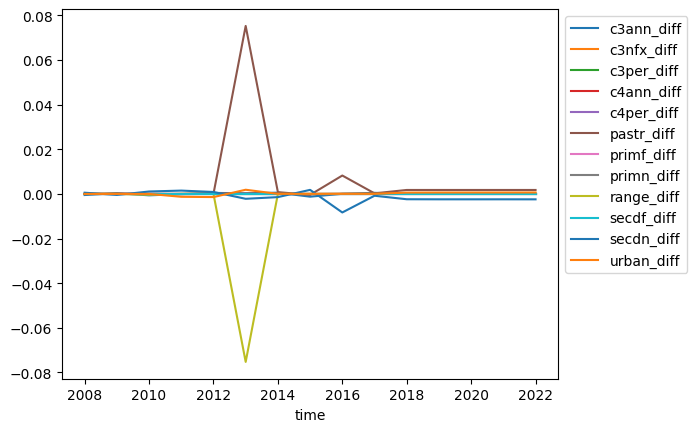

In [53]:
wales_X_df[["time"] + LAND_DIFF_FEATURES].plot(x='time')
plt.legend(bbox_to_anchor=(1.0, 1.0))

<AxesSubplot: xlabel='time'>

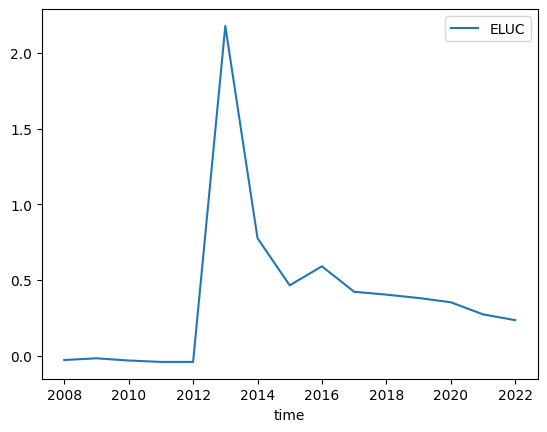

In [84]:
wales_y_df[['ELUC', 'time']].plot(x="time", y="ELUC")

In [86]:
wales_preds = predictor.predict(wales_X_df)

In [87]:
wales_preds.shape

(15,)

In [88]:
wales_y_df["ELUC_Pred"] = wales_preds

/var/folders/w6/w8ptt70j5ylfrcw1rgjc5pfr0000gq/T/ipykernel_40809/3821465445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wales_y_df["ELUC_Pred"] = wales_preds


In [90]:
wales_y_df

,time,i_lat,i_lon,mask,lat,lon,country,ELUC,ELUC_Pred
290,2008,52.875,-4.625,143.0,52.875,-4.625,143.0,-0.028018,-0.026722
792,2009,52.875,-4.625,143.0,52.875,-4.625,143.0,-0.017015,0.009534
1294,2010,52.875,-4.625,143.0,52.875,-4.625,143.0,-0.031517,-0.008809
1796,2011,52.875,-4.625,143.0,52.875,-4.625,143.0,-0.040686,-0.014137
2298,2012,52.875,-4.625,143.0,52.875,-4.625,143.0,-0.040769,0.001064
2800,2013,52.875,-4.625,143.0,52.875,-4.625,143.0,2.178015,0.093370
3302,2014,52.875,-4.625,143.0,52.875,-4.625,143.0,0.776525,0.030632
3804,2015,52.875,-4.625,143.0,52.875,-4.625,143.0,0.464882,-0.068703
4306,2016,52.875,-4.625,143.0,52.875,-4.625,143.0,0.590692,0.047891
4808,2017,52.875,-4.625,143.0,52.875,-4.625,143.0,0.422591,0.017002


<AxesSubplot: xlabel='time'>

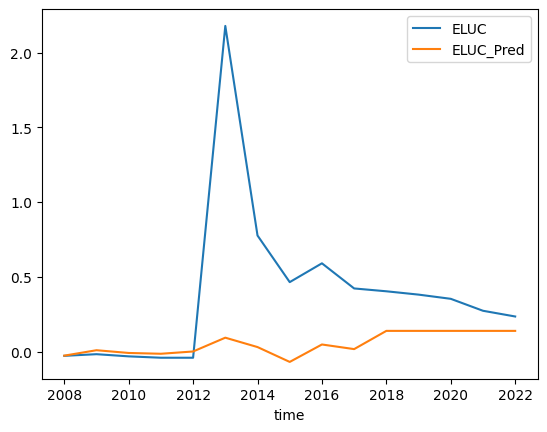

In [91]:
wales_y_df.plot(x="time", y=["ELUC", "ELUC_Pred"])